In [3]:
import pandas as pd
import numpy as np

df = pd.read_csv("./Data/yelp.csv")
df = df[["stars","text"]]
df['stars'] = df['stars'].map(lambda x : 1 if x >=4 else 0)

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer


/Users/jeweilin/Documents/Data Mining/myenv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
split_ratio = 0.8
split_point = int(split_ratio*len(df["text"]))
train_text = df["text"].tolist()[:split_point]
y_train = np.array(df["stars"].tolist()[:split_point])
test_text = df["text"].tolist()[split_point:]
y_test = np.array(df["stars"].tolist()[split_point:])

token = Tokenizer(num_words=10000) 
token.fit_on_texts(train_text)  

token.word_index #可以看到它將英文字轉為數字的結果，例如:the轉換成1

x_train_seq = token.texts_to_sequences(train_text)
x_test_seq = token.texts_to_sequences(test_text)

x_train = sequence.pad_sequences(x_train_seq, maxlen=2000)
x_test = sequence.pad_sequences(x_test_seq, maxlen=2000)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

In [7]:
modelCNN = Sequential()
modelCNN.add(Embedding(output_dim=300, input_dim=10000, input_length=2000)) 
modelCNN.add(Conv1D(32, 3, activation='relu', padding="same", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelCNN.add(MaxPooling1D(3))
modelCNN.add(Conv1D(32, 3, activation='relu', padding="same", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelCNN.add(MaxPooling1D(3))
modelCNN.add(Flatten()) #需要
modelCNN.add(Dropout(0.7))
modelCNN.add(Dense(128, activation='relu'))
modelCNN.add(Dense(1, activation='sigmoid'))

print(modelCNN.summary())
modelCNN.compile(loss='binary_crossentropy',optimizer='Nadam',metrics=['accuracy'])
history = modelCNN.fit(x_train, y_train, epochs = 10, batch_size = 50, verbose = 1, validation_split = 0.2)

/Users/jeweilin/Documents/Data Mining/myenv/lib/python3.9/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 116ms/step - accuracy: 0.6740 - loss: 1.1509 - val_accuracy: 0.6744 - val_loss: 0.6588
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.7261 - loss: 0.5765 - val_accuracy: 0.8294 - val_loss: 0.4588
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 118ms/step - accuracy: 0.8803 - loss: 0.3490 - val_accuracy: 0.8288 - val_loss: 0.4870
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9321 - loss: 0.2219 - val_accuracy: 0.8269 - val_loss: 0.5024
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 115ms/step - accuracy: 0.9635 - loss: 0.1555 - val_accuracy: 0.8081 - val_loss: 0.5832
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9742 - loss: 0.1120 - val_accuracy: 0.8087 - val_loss: 0.6561
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 121ms/step - accuracy: 0.9856 - loss: 0.0910 - val_accuracy: 0.7994 - val_loss: 0.7604
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 15s 119ms/step - accuracy: 0.9851 - lo

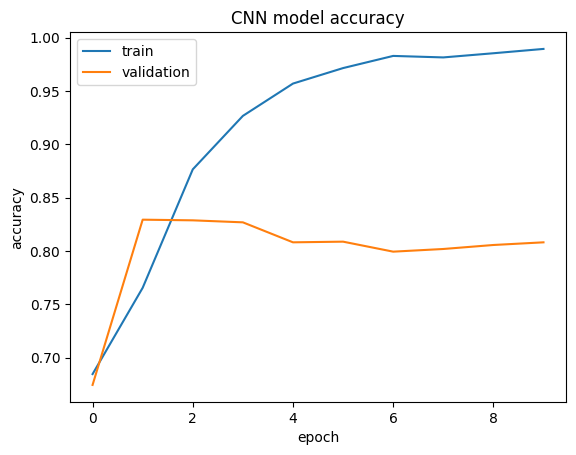

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#file_name = '/content/drive/MyDrive/DM HW4 picture/'+'CNN'+'accuracy.png'
#plt.savefig(file_name)
plt.show()

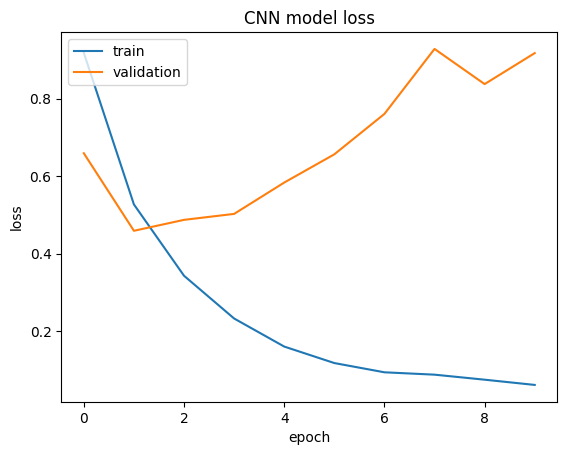

In [10]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#file_name = '/content/drive/MyDrive/DM HW4 picture/'+'CNN'+'loss.png'
#plt.savefig(file_name)
plt.show()

In [17]:

from tensorflow.keras.layers import Activation, Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [18]:
# 建立模型
modelLSTM = Sequential()
modelLSTM.add(Embedding(output_dim=300, input_dim=10000, input_length=2000)) 
modelLSTM.add(Dropout(0.2)) 
modelLSTM.add(LSTM(32))  # 使用 LSTM 層，不需要 CuDNNLSTM
modelLSTM.add(Dense(units=256, activation='relu'))
modelLSTM.add(Dropout(0.2))
modelLSTM.add(Dense(units=1, activation='sigmoid'))

# 顯示模型摘要
modelLSTM.summary()

# 編譯模型
adam = Adam()  # Adam 優化器，預設學習率 0.001
modelLSTM.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# 訓練模型
history = modelLSTM.fit(x_train, y_train, epochs=10, batch_size=50, verbose=1, validation_split=0.2)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 104s 804ms/step - accuracy: 0.6906 - loss: 0.6075 - val_accuracy: 0.7987 - val_loss: 0.4637
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 105s 824ms/step - accuracy: 0.8638 - loss: 0.3303 - val_accuracy: 0.8087 - val_loss: 0.4225
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 104s 812ms/step - accuracy: 0.9323 - loss: 0.1899 - val_accuracy: 0.7937 - val_loss: 0.4684
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 109s 848ms/step - accuracy: 0.9605 - loss: 0.1161 - val_accuracy: 0.8106 - val_loss: 0.7241
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 110s 862ms/step - accuracy: 0.9816 - loss: 0.0577 - val_accuracy: 0.7900 - val_loss: 0.7989
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 105s 820ms/step - accuracy: 0.9880 - loss: 0.0396 - val_accuracy: 0.7819 - val_loss: 1.1655
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 105s 820ms/step - accuracy: 0.9788 - loss: 0.0540 - val_accuracy: 0.7869 - val_loss: 1.0061
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 102s 800ms/step - accuracy: 0.9948 -

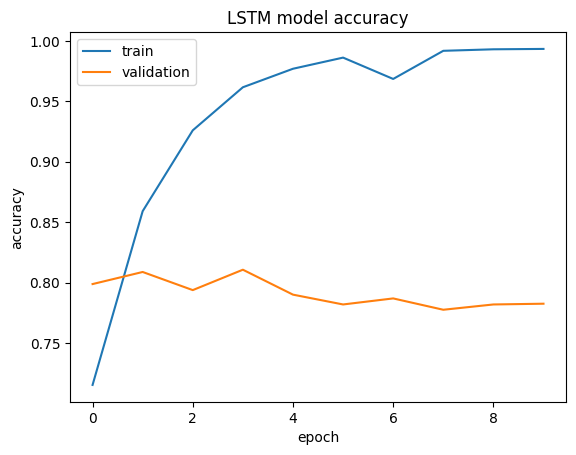

In [19]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

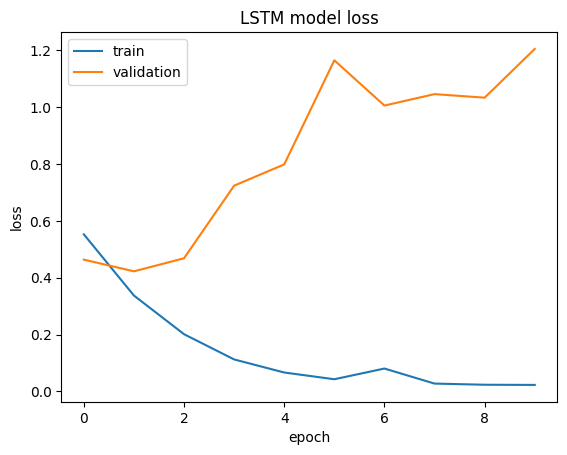

In [20]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
modelCNN2 = Sequential()
modelCNN2.add(Embedding(output_dim=300, input_dim=10000, input_length=2000)) 
modelCNN2.add(Conv1D(32, 3, activation='relu', padding="same", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelCNN2.add(MaxPooling1D(3))
modelCNN2.add(Conv1D(32, 3, activation='relu', padding="same", kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
modelCNN2.add(MaxPooling1D(3))
modelCNN2.add(Flatten()) #需要
modelCNN2.add(Dropout(0.7))
modelCNN2.add(Dense(128, activation='relu'))
modelCNN2.add(Dense(1, activation='sigmoid'))

print(modelCNN2.summary())
modelCNN2.compile(loss='binary_crossentropy',optimizer='Nadam',metrics=['accuracy'])
history = modelCNN2.fit(x_train, y_train, epochs = 3, batch_size = 50, verbose = 1, validation_split = 0.2)

CNN_scores = modelCNN2.evaluate(x_test, y_test,verbose=1)
print("CNN test set accuracy = ",round(CNN_scores[1],3))

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.6801 - loss: 1.1609 - val_accuracy: 0.6762 - val_loss: 0.6593
Epoch 2/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 123ms/step - accuracy: 0.7465 - loss: 0.5604 - val_accuracy: 0.8163 - val_loss: 0.4486
Epoch 3/3
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 122ms/step - accuracy: 0.8961 - loss: 0.3209 - val_accuracy: 0.8388 - val_loss: 0.4377
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8288 - loss: 0.4556
CNN test set accuracy =  0.835


In [22]:
# 建立模型
modelLSTM2 = Sequential()
modelLSTM2.add(Embedding(output_dim=300, input_dim=10000, input_length=2000)) 
modelLSTM2.add(Dropout(0.2)) 
modelLSTM2.add(LSTM(32))  # 使用 LSTM 層，不需要 CuDNNLSTM
modelLSTM2.add(Dense(units=256, activation='relu'))
modelLSTM2.add(Dropout(0.2))
modelLSTM2.add(Dense(units=1, activation='sigmoid'))

# 顯示模型摘要
modelLSTM2.summary()

# 編譯模型
adam = Adam()  # Adam 優化器，預設學習率 0.001
modelLSTM2.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# 訓練模型
history = modelLSTM2.fit(x_train, y_train, epochs=2, batch_size=50, verbose=1, validation_split=0.2)

# 評估模型
LSTM_scores = modelLSTM2.evaluate(x_test, y_test, verbose=1)
print("LSTM test set accuracy = ", round(LSTM_scores[1], 3))

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
128/128 ━━━━━━━━━━━━━━━━━━━━ 102s 795ms/step - accuracy: 0.6985 - loss: 0.6071 - val_accuracy: 0.8081 - val_loss: 0.4322
Epoch 2/2
128/128 ━━━━━━━━━━━━━━━━━━━━ 105s 821ms/step - accuracy: 0.8649 - loss: 0.3313 - val_accuracy: 0.8194 - val_loss: 0.4324
63/63 ━━━━━━━━━━━━━━━━━━━━ 8s 123ms/step - accuracy: 0.7960 - loss: 0.4344
LSTM test set accuracy =  0.804
